In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")  
%matplotlib inline

In [2]:
#Importing the dataset
df =pd.read_csv("realtor-data.csv")

#Looking into the data set
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [3]:
#Checking the number of Columns and Rows
df.shape

(733159, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733159 entries, 0 to 733158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        733159 non-null  object 
 1   price         733088 non-null  float64
 2   bed           617177 non-null  float64
 3   bath          621407 non-null  float64
 4   acre_lot      572378 non-null  float64
 5   full_address  733159 non-null  object 
 6   street        732069 non-null  object 
 7   city          733087 non-null  object 
 8   state         733159 non-null  object 
 9   zip_code      732957 non-null  float64
 10  house_size    520772 non-null  float64
 11  sold_date     347237 non-null  object 
dtypes: float64(6), object(6)
memory usage: 67.1+ MB


In [5]:
#Checking Null values
df.isnull().sum()

status               0
price               71
bed             115982
bath            111752
acre_lot        160781
full_address         0
street            1090
city                72
state                0
zip_code           202
house_size      212387
sold_date       385922
dtype: int64

In [6]:
#Checking the duplicated values count
df.duplicated("full_address").sum()

629478

In [7]:
#Dropping duplicates
df.drop_duplicates("full_address",inplace=True, keep= "first")

In [8]:
df.isnull().sum()

status              0
price               5
bed             16069
bath            15247
acre_lot        25808
full_address        0
street            216
city               22
state               0
zip_code           31
house_size      32493
sold_date       49327
dtype: int64

In [9]:
df.dropna(subset=["sold_date","house_size","bed","bath"],inplace=True)

In [10]:
df.isnull().sum()

status             0
price              0
bed                0
bath               0
acre_lot        7834
full_address       0
street            65
city               0
state              0
zip_code           0
house_size         0
sold_date          0
dtype: int64

In [11]:
df.shape

(38816, 12)

In [12]:
#Changing sold_date to date format
df["sold_date"]=pd.to_datetime(df["sold_date"])

In [13]:
#Removing Special Characters
df['full_address'] = df['full_address'].str.replace (r"""[^\w\s]+""","")
df['street'] = df['street'].str.replace (r"""[^\w\s]+""","")

/var/folders/b1/kgtn12414_q3z787cvx96gbm0000gn/T/ipykernel_11970/1167094337.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['full_address'] = df['full_address'].str.replace (r"""[^\w\s]+""","")
/var/folders/b1/kgtn12414_q3z787cvx96gbm0000gn/T/ipykernel_11970/1167094337.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['street'] = df['street'].str.replace (r"""[^\w\s]+""","")


In [14]:
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
684,for_sale,76900.0,3.0,2.0,NaN,E 331 Apt E 331 Alborada Unit E331 Canovanas P...,E 331 Apt E 331 Alborada Unit E331,Canovanas,Puerto Rico,729.0,1200.0,2020-02-28
829,for_sale,110000.0,7.0,3.0,0.09,B2 Monte Elena Dorado PR 00949,B2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
4608,for_sale,159000.0,3.0,2.0,NaN,784 Carretera Unit B302 Caguas PR 00725,784 Carretera Unit B302,Caguas,Puerto Rico,725.0,1625.0,2021-09-15
10344,for_sale,950000.0,5.0,4.0,0.99,46 Water Isle Saint Thomas VI 00802,46 Water Isle,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11
10351,for_sale,6899000.0,4.0,6.0,0.83,10 Water Isle Saint Thomas VI 00802,10 Water Isle,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05


In [15]:
df.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,3.881600e+04,38816.000000,38816.000000,30982.000000,38816.000000,38816.000000
mean,7.896824e+05,3.325278,2.515097,4.425460,9146.926242,2086.665628
std,4.679379e+06,1.468419,1.414461,193.352072,5181.243018,1873.009350
min,1.000000e+04,1.000000,1.000000,0.000000,725.000000,170.000000
25%,2.699000e+05,2.000000,2.000000,0.090000,6401.000000,1194.000000
50%,4.200000e+05,3.000000,2.000000,0.210000,8079.000000,1642.000000
75%,7.299000e+05,4.000000,3.000000,0.540000,10803.000000,2418.250000
max,8.750000e+08,47.000000,39.000000,18817.000000,30228.000000,99999.000000


In [16]:
df.sort_values(by="price",ascending=False).head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
572886,for_sale,875000000.0,9.0,2.0,NaN,952 E 223 St Units 4858 66 Bronx NY 10458,952 E 223 St Units 4858 66,Bronx,New York,10458.0,2440.0,2002-12-30
40599,for_sale,60000000.0,9.0,10.0,400.00,450 Brickyard Rd Woodstock CT 06281,450 Brickyard Rd,Woodstock,Connecticut,6281.0,18777.0,2003-08-28
479936,for_sale,45000000.0,4.0,5.0,NaN,30 Park Pl Ph 81 Manhattan NY 10007,30 Park Pl Ph 81,Manhattan,New York,10007.0,5443.0,2017-02-01
460851,for_sale,39000000.0,8.0,13.0,8.23,555 Lake Ave Greenwich CT 06830,555 Lake Ave,Greenwich,Connecticut,6830.0,18954.0,2000-07-17
469750,for_sale,35000000.0,4.0,5.0,NaN,443 Greenwich St Ph G New York NY 10013,443 Greenwich St Ph G,New York,New York,10013.0,5375.0,2022-01-10


/Users/omarabdelaty/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


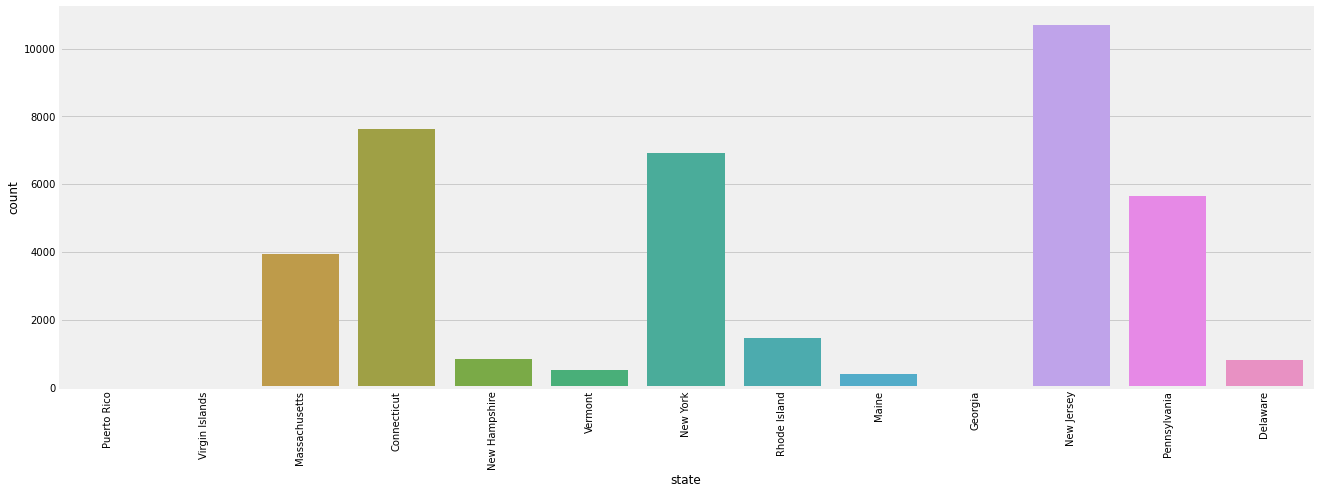

In [17]:
plt.figure(figsize=(20,7))
sns.countplot(df['state'])
plt.xticks(rotation=90)
plt.show();

<AxesSubplot:xlabel='sold_date', ylabel='price'>

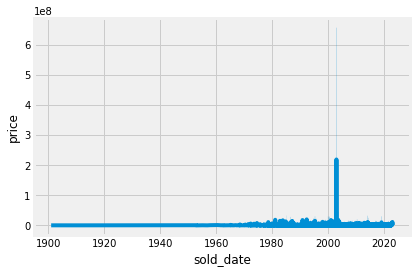

In [18]:
sns.lineplot(data=df , x="sold_date",y="price")

Text(0.5, 1.0, 'The relation between number of baths and price')

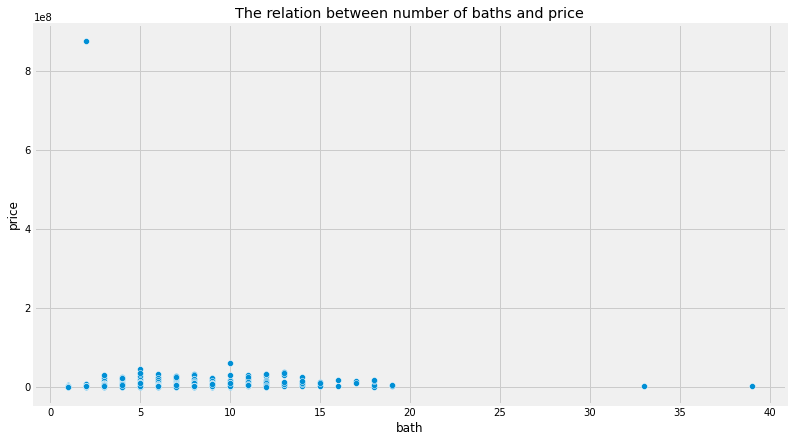

In [19]:
#Checking Outliers
plt.figure(figsize=(12,7))
sns.scatterplot(data=df,x="bath",y="price")
plt.title("The relation between number of baths and price")

In [20]:
#Removing outliers
df.drop(df[df['price'] >= 50000000].index, inplace = True)
df.drop(df[df['bath'] >= 20].index, inplace = True)

Text(0.5, 1.0, 'The relation between number of baths and price')

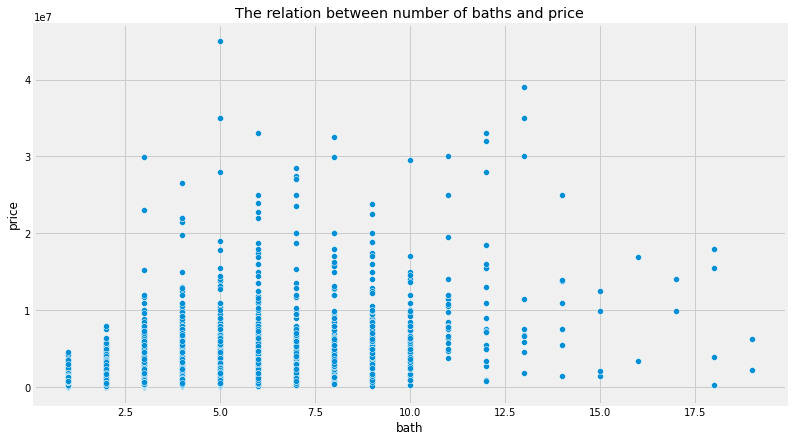

In [21]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df,x="bath",y="price")
plt.title("The relation between number of baths and price")

Text(0.5, 1.0, 'The relation between number of Beds and price')

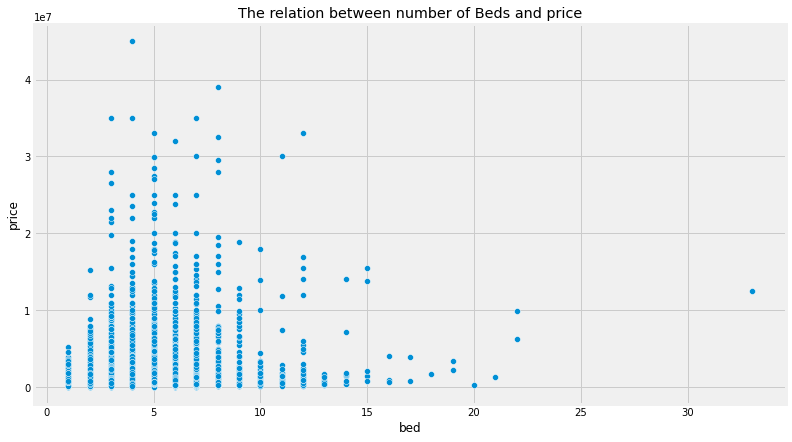

In [22]:
#Checking Outliers

plt.figure(figsize=(12,7))

sns.scatterplot(data=df,x="bed",y="price")
plt.title("The relation between number of Beds and price")

In [23]:
#Removing Outliers
df.drop(df[df['bed'] >= 25].index, inplace = True)

Text(0.5, 1.0, 'The relation between number of Beds and price')

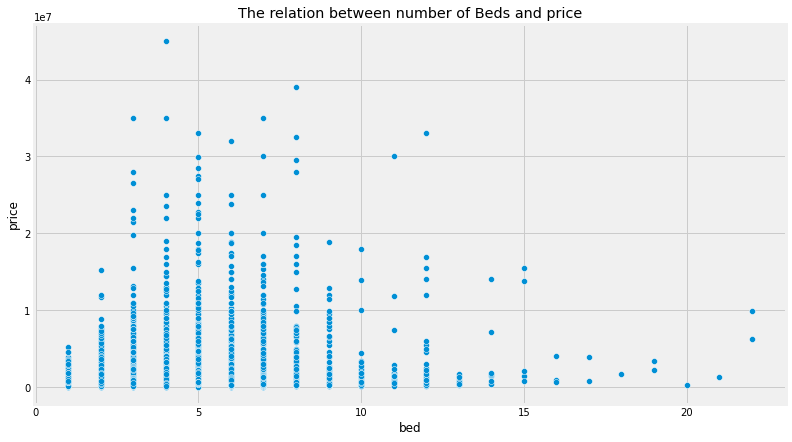

In [24]:
#Showing the relation between number of Beds and price

plt.figure(figsize=(12,7))

sns.scatterplot(data=df,x="bed",y="price")
plt.title("The relation between number of Beds and price")

Text(0.5, 1.0, 'The relation between House size and price')

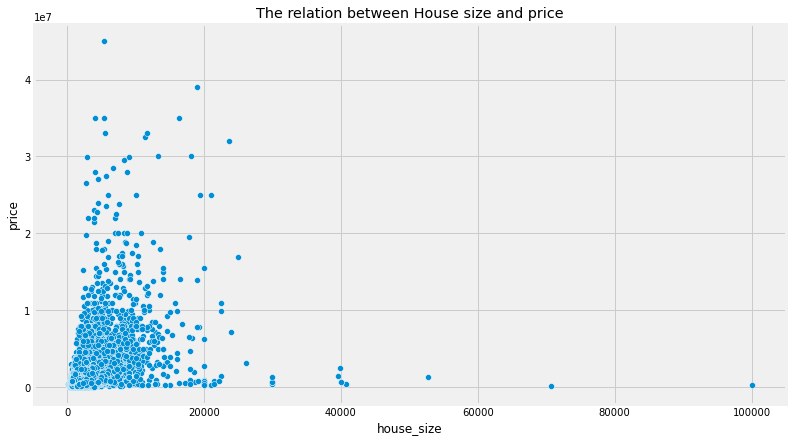

In [25]:
#Showing the relation between House size and price

plt.figure(figsize=(12,7))

sns.scatterplot(data=df,x="house_size",y="price")
plt.title("The relation between House size and price")

In [26]:
#Removing Outliers
df.drop(df[df['house_size'] >= 35000].index, inplace = True)

Text(0.5, 1.0, 'The relation between House size and price')

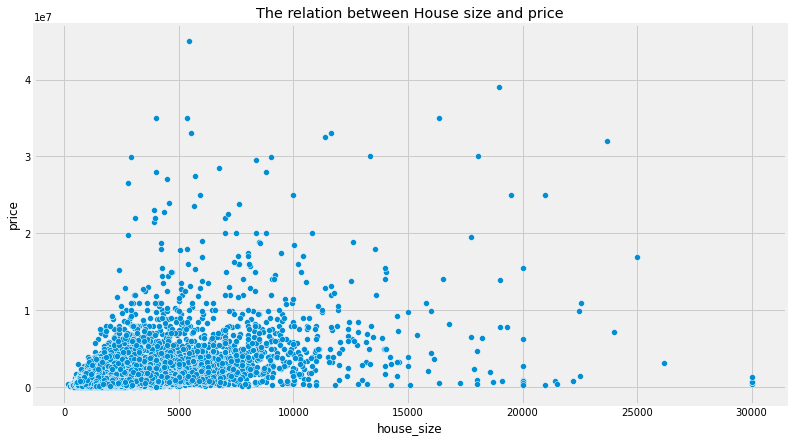

In [27]:
#Showing the relation between House size and price

plt.figure(figsize=(12,7))

sns.scatterplot(data=df,x="house_size",y="price")
plt.title("The relation between House size and price")

In [28]:
#Saving filtered data into a csv file
df.to_csv('realtor_data_filtered.csv')